# User Story 3
- User utilizes the CurrentExp class to initialize a whole experiment as an object
- User fills out the Blueprint with the PARAMETERS and deliver it to the class.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef.

In [12]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [6]:
from basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from apply_dca import apply_label_errors, visualize_acc_decr, visualize_trace_M, check_for_results

In [7]:
DATASET_NAME = "Beef"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"random_seed":0,"start":0,"stop":26,"step":1}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True     

In [8]:
from current_experiment import CurrentExp
# Example usage
experiment = CurrentExp(
    dataset_name=DATASET_NAME, 
    classifier_name=CLASSIFIER_NAME, 
    reduction_factor=REDUCTION_F, 
    random_seed=0, 
    doe_param=DoE_PARAM 
)

X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)


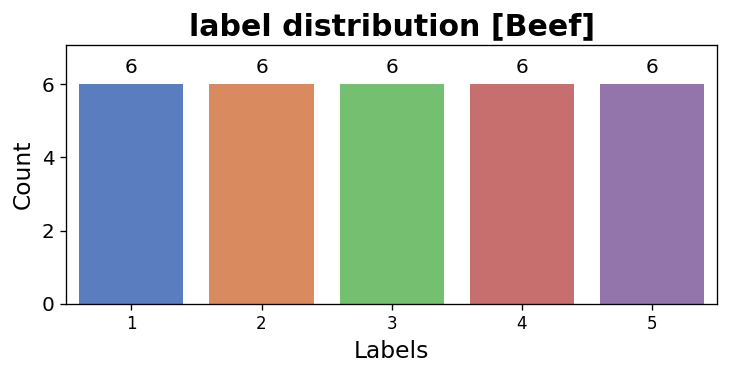

In [9]:
experiment.dataset_overview()

In [10]:
experiment.run_experiment()

X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


searching for ['Beef_res_0_0_26_1.csv'] in simulation_results/MR-Hydra/Beef
Potential Files in the current directory:  ['.DS_Store', 'Beef_res_0_0_23_1.csv', 'Beef_res_0_0_18_1.csv', 'Beef_res_TEST.csv', 'Beef_res_0_0_16_2.csv', 'Beef_res_0_0_6_2.csv']
Partial Match found:  [('simulation_results/MR-Hydra/Beef/Beef_res_0_0_23_1.csv', 23, 1)]
Partial Match found:  [('simulation_results/MR-Hydra/Beef/Beef_res_0_0_23_1.csv', 23, 1), ('simulation_results/MR-Hydra/Beef/Beef_res_0_0_18_1.csv', 18, 1)]
update closest_file
Continuing from 23 to 26 with step 1.
{'1': [], '2': [], '3': [12, 13, 16], '4': [19, 21, 23], '5': [27]}
changed label 4 to 1 at index 19 of the data
current class balance distribution: {'1': 6, '2': 5, '3': 5, '4': 6, '5': 8}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=0.85s, Eval Time=1.48s



Algorithm                         Accuracy
MR-Hydra                          0.1333
current iteration: 24   current LE_step: 24 error_relative: 0.7992
changed label 3 to 5 at index 16 of the data
current class balance distribution: {'1': 6, '2': 5, '3': 4, '4': 6, '5': 9}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=0.91s, Eval Time=1.52s



Algorithm                         Accuracy
MR-Hydra                          0.1000
current iteration: 25   current LE_step: 25 error_relative: 0.8325
changed label 5 to 2 at index 27 of the data
current class balance distribution: {'1': 6, '2': 6, '3': 4, '4': 6, '5': 8}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=0.91s, Eval Time=1.48s



Algorithm                         Accuracy
MR-Hydra                          0.1000
current iteration: 26   current LE_step: 26 error_relative: 0.8658


In [11]:
experiment.df_

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
0,0,0,0.0000,0.7667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
1,1,1,0.0333,0.7333,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
2,2,2,0.0666,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
3,3,3,0.0999,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
4,4,4,0.1332,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
5,5,5,0.1665,0.7333,"[1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
6,6,6,0.1998,0.7000,"[1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
7,7,7,0.2331,0.6667,"[1, 1, 1, 1, 1, 1, 2, 5, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 5, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
8,8,8,0.2664,0.6333,"[1, 1, 1, 1, 1, 5, 2, 5, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 5, 2, 5, 2, 1, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
9,9,9,0.2997,0.5667,"[1, 1, 1, 1, 1, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, ...","[3, 1, 1, 1, 1, 5, 3, 5, 3, 1, 1, 5, 3, 3, 3, ...","[[0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0...."
